This notebook will guide you through the utilisation of ARDENT to derive dynamical detection limits. These take into account both the radial velocity (RV) data at hand and the stability constraints to quantify the completeness of planetary systems. 

This tutorial presents an analysis of TOI-1736. This system contains an inner sub-Neptune with an orbital period of 7 days, and an outer eccentric cold giant (P=570 days, e=0.36). Here, we use the published SOPHIE data (Martioli et al. 2023). The residual RVs are available in the same folder as this notebook. 

Follow the ardent installation instructions before running this tutorial. 

In [1]:
import numpy as np
import os
import ardent 

### RV data and system parameters

Retrieve the residual RV timeseries, where the best-fit model was removed (2 planets + drift). You will find them in the file 'TOI1736_sophie_residualRV.dat', located in the same folder as this tutorial. Note: alternatively, you can analyse the public RVs and derive the residuals yourself.

Initialise an ardent object with this timeseries. 


In [2]:
# For this tutorial, use the RV file 'TOI1736_sophie_residualRV.dat'. 
data = np.genfromtxt('TOI1736_sophie_residualRV.dat', skip_header=int(2))
jdb, rv, rv_err = data[:,0:3].T

# Initialise ardent
vec = ardent.ARDENT_tableXY(jdb, rv, rv_err) 

# Add the star BEFORE defining an output folder
vec.ARDENT_AddStar(mass=1.08,starname='TOI-1736') # No space character allowed in star name

# Define an output folder that will contain the results of this ardent run
vec.ARDENT_Set_output_dir('HandsOnTuto')

##### The residual RVs are not available? 
The RV residuals are not always available from publications, and you may not want to take the (sometimes long) time to fit the RVs yourself. An alternative way to compute data-driven detection limits is to pass a vector of zeros in place of the RVs. ARDENT will then automatically reconstruct a RV timeseries from the time + RV_err vectors, where RV_err is used to generate a scatter around the injected planet signal. 

Add the known planets into the ardent object. 

In [3]:
# ARDENT_AddPlanets(self, p=365.25, semi_major=np.nan, mean_long=0.0, mean_anomaly=np.nan, 
#                   peri_time=np.nan, e=0.0, elower=np.nan, omega=0.0, inc=90.0, asc_node=0.0, 
#                   k=0.10, mass=np.nan)

# For a full list of argument definitions, check the docstrings

vec.ARDENT_AddPlanets(p=570.3, k=200.4, e=0.362, omega=164.3, asc_node = 0.0, mean_long=244.0, inc=70.0)
vec.ARDENT_AddPlanets(p=7.065, k=4.34, e=0.21, elower=0.0, omega=0.0, asc_node = 0.0, mean_long=247.2, inc=90.0)


# Alternatively, you can import the planets via an input parameter file 
# (in this case, named system_parameters.dat): 

# vec.ARDENT_ImportPlanets('system_parameters.dat')


 [INFO] Mass calculated to be 2713.55 Earth mass

 [INFO] Semi-major axis calculated to be 1.38 AU

 [INFO] Planet parameters: 

          period  semimajor  mean_long  mean_anomaly  pericenter_time    ecc  \
planet 1   570.3   1.384325      244.0           NaN              NaN  0.362   

          periastron   inc  asc_node  semi-amp         mass  
planet 1       164.3  70.0       0.0     200.4  2713.545811  

 [INFO] Orbital eccentricity: the lower limit is adopted as the nominal value (0.000)

 [INFO] Mass calculated to be 13.71 Earth mass

 [INFO] Semi-major axis calculated to be 0.07 AU

 [INFO] Planet parameters: 

           period  semimajor  mean_long  mean_anomaly  pericenter_time    ecc  \
planet 1  570.300   1.384325      244.0           NaN              NaN  0.362   
planet 2    7.065   0.073931      247.2           NaN              NaN  0.000   

          periastron   inc  asc_node  semi-amp         mass  
planet 1       164.3  70.0       0.0    200.40  2713.545811  
pl

#### -------------------------------------------------------------------------------------------
#### An important note on the orbital eccentricities and observational uncertainties 

Generally, small signal-to-noise ratio RV signals lead to large uncertainties and over-estimations of the eccentricities. As a result, the stability of the system is artificially disfavoured. In the case of ARDENT, over-estimating the eccentricities biases the dynamical detection limits by wrongly excluding regions of the (period, mass) space. To prevent this bias, the parameter `elower` enables you to indicate the 1 or 2-sigma lower limit on the eccentricity when its uncertainty is significant. When `elower` is specified, ARDENT automatically uses this value to model the dynamics in the system, instead of the median eccentricity `e`. 

+ In the reference publication from Martioli et al. (2023), the eccentricity of the inner planet is reported with an upper limit only, i.e. it is not significant. Therefore, we add the paramater `e_lower=0`. 
+ For the outer planet, the eccentricity is well constrained to 0.362 +/- 0.003. We hence set it to 0.362. 
#### -------------------------------------------------------------------------------------------

A built-in function allows to plot the planetary orbits, and saves the figure in the output folder 

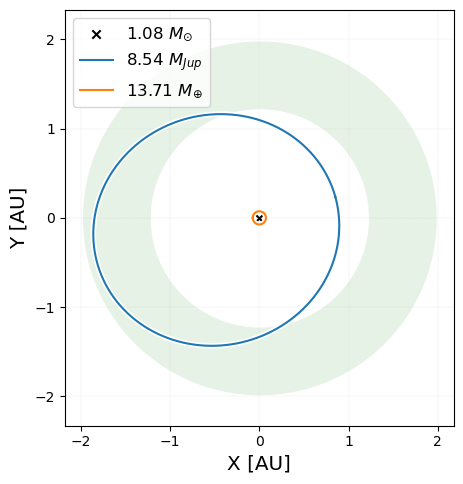

In [4]:
vec.ARDENT_PlotPlanets(new=True)

You can also plot the residual RV timeseries and its generalised Lomb-Scargle (GLS) periodogram


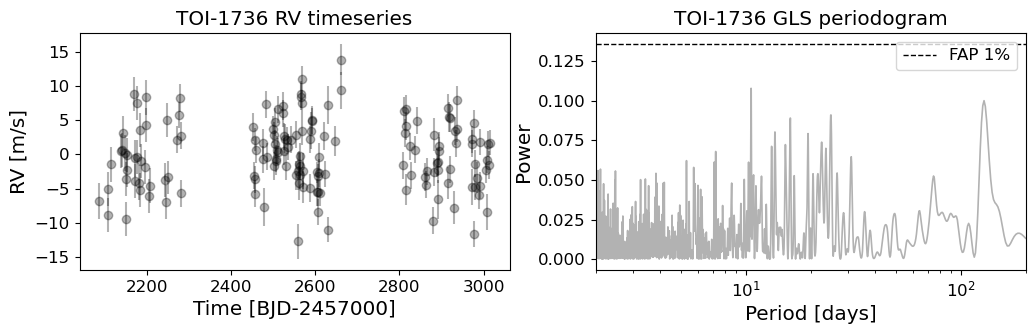

In [5]:
vec.ARDENT_Plot()

### Data-driven detection limits

Now that you set up ARDENT, it is time to see if and which additional planets could have been missed in the data! The specificity of ARDENT is that it computes not only the classic "data-driven" detection limits, but also tests the dynamical plausibility of additional planets in the system. As such, it creates new detection limits that take into account the orbital stablity, what we call for short the "dynamical detection limits". 

But first, let's compute the data-driven detection limits! It only takes 1 line of code. Here we want to know which planets could have been missed in the period range between 2 and 600 days.


HandsOnTuto/TOI-1736_
 [INFO] Injection-recovery tests made on RV residuals.


  8%|███▏                                    | 162/2000 [00:28<05:23,  5.69it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 40%|███████████████▊                        | 791/2000 [02:19<03:37,  5.56it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 40%|███████████████▉                        | 794/2000 [02:20<03:37,  5.55it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 71%|███████████████████████████▊           | 1425/2000 [04:14<01:43,  5.58it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 94%|████████████████████████████████████▋  | 1881/2000 [05:36<00:21,  5.58it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


100%|███████████████████████████████████████| 2000/2000 [05:57<00:00,  5.59it/s]


 [INFO] Creation of an output file M-vs-P for 95% data-driven DL
 [INFO] Creation of an output file M-vs-P for 50% data-driven DL


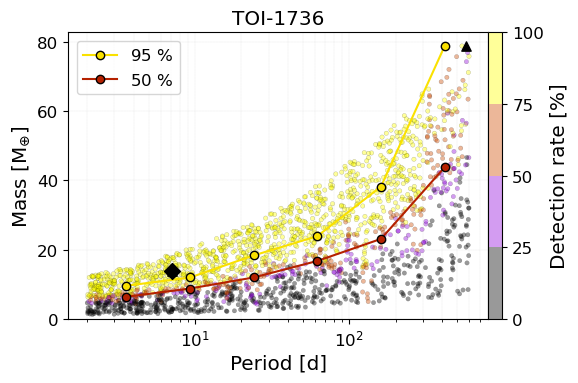

In [6]:
#ARDENT_DetectionLimitRV(self, rangeP=[2., 600.], rangeK=[0.1, 1.2], inc_inject=90., 
#                        fap_level=0.01, Nsamples=2000, Nphases=4)

# With rangeK in units of RV rms (root mean square)
# For a full list of argument definitions, check the docstrings

vec.ARDENT_DetectionLimitRV(rangeP=[2., 600.]) 

The above function executes injection-recovery tests, from which it computes by default the 50% and 95% data-driven detection limits in the mass-period space. In the output folder, this function will create: 
+ A file containing all the injection-recovery tests: 'TOI-1736_InjectRecovTests_0.p' 
+ Its easy-to-read equivalent: 'Injection-recovery_tests.dat'
+ A file for each detection limits curve (both 50% and 95%): 'DataDL_M_perc50_0.dat' and 'DataDL_M_perc95_0.dat' 
+ The resulting plot: 'TOI-1736_InjectRecovTests_0_MvsP.png' 

The percentage thresholds of detection can be modified. Also, it is possible to plot the data-driven detection limits with different X and Y axes: 
+ X-axis: Period P or semi-major axis a
+ Y-axis: Mass or RV semi-amplitude K. For the mass, choose the units: Earth (default) or Jupiter. 



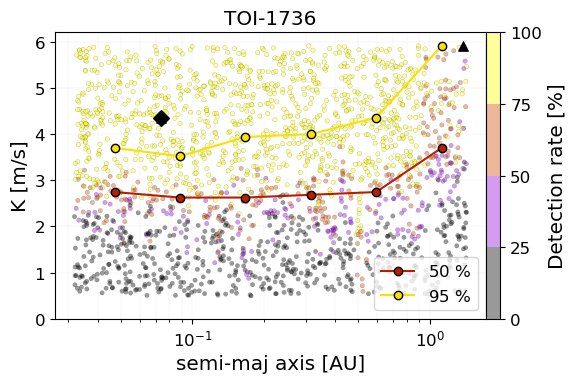

In [7]:
#ARDENT_Plot_DataDL(self, output_file=None, percentage=[50,95], nbins=6, axis_x_var='P', 
#                   axis_y_var='M', MassUnits='Earth', new=True, legend=True)

vec.ARDENT_Plot_DataDL(axis_x_var='a', axis_y_var='K')

##### Automatic (system-independent) computation of the data-driven detection limits
ARDENT offers also the possibility to compute RV detection limits automatically with general settings. This is particularly useful when analysing a large set of stars. With this option, the period range inside which to compute detection limits is estimated by default as 55% of the RV baseline (however, you can also modify this parameter). To call the automatic RV detection limits function, use the following line: 

In [ ]:
#ARDENT_DetectionLimitRV_auto(self, rangeP=None, fap_level=0.01)

vec.ARDENT_DetectionLimitRV_auto()

### Dynamical detection limits 

The injection-recovery tests carried out above are used as input for the computation of the dynamical detection limits, together with the planet parameters defined earlier. To compute the dynamical detection limits, it is again very simple: 

In [8]:
#ARDENT_DetectionLimitStab(self, NlocalCPU=1, InjectionRecoveryFile=None, ExternalDataDL=None, param_file=None, 
#                          nbins=15, integration_time=None, dt=None, Nphases=4, min_dist=3, max_dist=5, 
#                          max_drift_a=0.0025, GR=False, fine_grid=True, relaunch=False)

vec.ARDENT_DetectionLimitStab(NlocalCPU=5, InjectionRecoveryFile='HandsOnTuto/TOI-1736_InjectRecovTests_0.p')

 [INFO] Creation of an output file M-vs-P for 95% data-driven DL

 [INFO] Processing stability estimation at period 3.632800[d] (bin 5 / 165)  <---------
 [INFO] Completed stability estimation at period 3.632800[d] (bin 5 / 165) <---------

 [INFO] Processing stability estimation at period 3.684100[d] (bin 6 / 165)  <---------
 [INFO] Completed stability estimation at period 3.684100[d] (bin 6 / 165) <---------

 [INFO] Processing stability estimation at period 4.063500[d] (bin 13 / 165)  <---------
 [INFO] Completed stability estimation at period 4.063500[d] (bin 13 / 165) <---------

 [INFO] Processing stability estimation at period 4.237800[d] (bin 16 / 165)  <---------
 [INFO] Completed stability estimation at period 4.237800[d] (bin 16 / 165) <---------

 [INFO] Processing stability estimation at period 4.674200[d] (bin 23 / 165)  <---------
 [INFO] Completed stability estimation at period 4.674200[d] (bin 23 / 165) <---------

 [INFO] Processing stability estimation at period 5.0


 [INFO] Processing stability estimation at period 2.462700[d] (bin 1 / 165)  <---------
 [INFO] Completed stability estimation at period 2.462700[d] (bin 1 / 165) <---------

 [INFO] Processing stability estimation at period 3.896300[d] (bin 10 / 165)  <---------
 [INFO] Completed stability estimation at period 3.896300[d] (bin 10 / 165) <---------

 [INFO] Processing stability estimation at period 4.178900[d] (bin 15 / 165)  <---------
 [INFO] Completed stability estimation at period 4.178900[d] (bin 15 / 165) <---------

 [INFO] Processing stability estimation at period 4.481900[d] (bin 20 / 165)  <---------
 [INFO] Completed stability estimation at period 4.481900[d] (bin 20 / 165) <---------

 [INFO] Processing stability estimation at period 4.807000[d] (bin 25 / 165)  <---------
 [INFO] Completed stability estimation at period 4.807000[d] (bin 25 / 165) <---------

 [INFO] Processing stability estimation at period 5.155600[d] (bin 30 / 165)  <---------
 [INFO] Completed stability


 [INFO] Processing stability estimation at period 3.582300[d] (bin 3 / 165)  <---------
 [INFO] Completed stability estimation at period 3.582300[d] (bin 3 / 165) <---------

 [INFO] Processing stability estimation at period 3.788700[d] (bin 8 / 165)  <---------
 [INFO] Completed stability estimation at period 3.788700[d] (bin 8 / 165) <---------

 [INFO] Processing stability estimation at period 3.951200[d] (bin 11 / 165)  <---------
 [INFO] Completed stability estimation at period 3.951200[d] (bin 11 / 165) <---------

 [INFO] Processing stability estimation at period 4.358200[d] (bin 18 / 165)  <---------
 [INFO] Completed stability estimation at period 4.358200[d] (bin 18 / 165) <---------

 [INFO] Processing stability estimation at period 4.545100[d] (bin 21 / 165)  <---------
 [INFO] Completed stability estimation at period 4.545100[d] (bin 21 / 165) <---------

 [INFO] Processing stability estimation at period 4.943500[d] (bin 27 / 165)  <---------
 [INFO] Completed stability e

The above function generates two output files. 
+ 'TOI-1736_DynamicalDL_0.dat': These are the dynamical detection limits, where the first column represents the central values of the period bins (in days), and the second column is the mass (in Earth units). 
+ 'TOI-1736_AllStabilityRates_0.dat': This file reports on all the (Period, Mass) pairs whose stability has been tested. Again, first column for period bins and second column for the mass. 

This computation will take more time than the data-driven detection limits, since it is likely that several numerical integrations are needed in the process. On a MacBook Pro equipped with the M2 chip, this same computation took about 20 minutes with default integration timespans of 1e4 x P_outer. Increasing the integration time (via the input parameter `integration_time`) will strengthen the dynamical constraint, but also increase the computation time. For instance, setting `integration_time` to 1e5 years, the computation of the dynamical detection limits takes about 2 hours. 

On the contrary, opting for a too small integration time will result in an unreliable estimation of orbital stability. Numerically, the latter is obtained from the measure of the chaos in the system via a simple estimation of the semi-major axes drift. The larger this drift, the more chaotic and unstable the system is. This drift can be reliably estimated only if the semi-major axis long-term cyclic variations are properly averaged out, implying a minimum timespan of integration required. As a rule of thumb, the period of secular cyclic variations depends on the ratio of the stellar mass over the planets mass, and on the orbital period of the outermost planet. 

Given that the function computing dynamical detection limits is at the core of ARDENT, we introduce its arguments below.

`ARDENT_DetectionLimitStab(self, NlocalCPU=1, InjectionRecoveryFile=None, ExternalDataDL=None, param_file=None, nbins=15, integration_time=None, dt=None, Nphases=4, min_dist=3, max_dist=5, max_drift_a=0.0025, GR=False, fine_grid=True, relaunch=False)` 

+ `NlocalCPU` sets the number of CPU cores you want to dedicate to these numerical simulations on your local machine. A larger number will decrease the overall computation time, mostly speeding up the numerical integrations of the planetary orbits evolution. ARDENT can also be run on a HPC cluster, in which case set `NlocalCPU` to 0. From the HPC cluster, you can then specify the number of cores you want to dedicate, for instance via the slurm argument --array of sbatch.

+ `InjectionRecoveryFile` is the path to the injection-recovery tests file, located inside your output folder. This argument is not necessary if you processed both data-driven and dynamical detection limits in the same session, in which case ARDENT kept the information in memory and does not need the output file.

+ `ExternalDataDL` is specified if data-driven detection limits are already available from an external software, and ARDENT is only required to compute the dynamical limits. `ExternalDataDL` is of the form [Pbins, Mlimits], where Pbins and Mlimits are 1D arrays of period bins (in days) and mass detection limits (in M_Earth). If `ExternalDataDL` is specified, `InjectionRecoveryFile` is set to None. See below for further explanations.

+ `param_file` is the path to the parameter file. This is the same file than the one that can be used to import the planets. Again, this is not necessary but enables working with input files instead of adding the parameters directly in the function (via the following arguments).

+ `nbins` is the number of period bins where to compute the dynamical detection limits.

+ `integration_time` is the total time (in years) of each numerical integration. Default is 1e4*Pouter, which is a good trade-off between computation speed and reliable short-term stability estimation.

+ `dt` is the numerical integration timestep, and is set by default to P_inner/50. Units are in years.

+ `Nphases` The stability of each injected planet in the (P, M) space is tested for various initial orbital phases. `Nphases` indicates the number of different phases with which to inject each planet. The phase is then drawn evenly in [-pi,pi[.

+ `min_dist` and `max_dist` are the minimum and maximum distance approach criteria (i.e., close encounter and escape criteria, respectively). `min_dist` is expressed in units of Hill radius of the innermost planet. `max_dist` is expressed in units of semi-major axis of the outermost planet a_outer.

+ `max_drift_a` specifies the stability criterion for the numerical simulations. It is a criterion on the maximum allowed relative drift in semi-major axis: abs(a(2)-a(1))/a(t0), where a(t1) and a(t2) are the median a over the first and second half of the integration, respectively, and a(t0) is the initial semi-major axis. ARDENT computes this drift for all the planets in the system, and if at least one planet has a drift larger than `max_drift_a`, the system is classified as unstable. By default, `max_drift_a` is set to 0.0025, based on calibration experiments carried out in systems containing inner small planets and an outer giant (cf. Stalport et al. 2025, ARDENT: A Python package for fast dynamical detection limits with radial velocities).

+ `GR` A general relativity correction can be applied to the numerical simulations if needed. Simply set `GR` to True to activate this correction (default is False).

+ `fine_grid` creates a denser period sampling around the known planets. In particular, it generates 100 additional period bins around each known planet i, between 0.5*Pi and 2*Pi. This option is useful to catch the main mean-motion resonances, and to precisely estimate instability windows. Default is True, set to False to deactivate this option. 

+ `relaunch` If True, re-run the detection limits computation and re-write the output files, even if such output files are already existing.

Once ARDENT finishes the computation of the stability constraints, we can plot the final detection limits! The following function plots and compares the data-driven and dynamical detection limits. 

Note: the arguments `DataDLfile` (path to data-driven detection limits) and `DynDLfile` (path to dynamical detection limits) are not necessary if you ran everything in the same session, because their paths are saved in ARDENT.

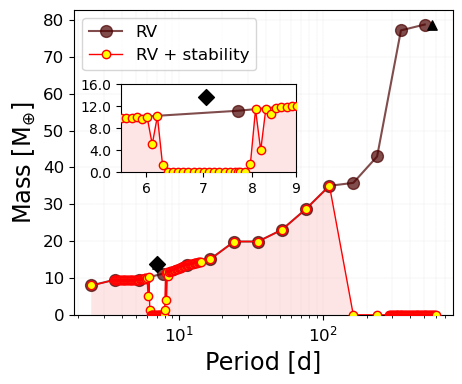

In [9]:
# ARDENT_Plot_StabDL(self, DataDLfile=None, DynDLfile=None, MassUnits='Earth', axis_x_var='P',
#                            inset_plot=False, zoom_xlim=None, zoom_ylim=None)

vec.ARDENT_Plot_StabDL(DataDLfile='HandsOnTuto/DataDL_M_perc95_0.dat', \
                       DynDLfile='HandsOnTuto/TOI-1736_DynamicalDL_0.dat', \
                       inset_plot=True, zoom_xlim=[5.6,9.0], zoom_ylim=[0,16])

Alternatively, you can also plot these detection limits in the orbital plane

 [INFO] Creation of an output file M-vs-P for 95% data-driven DL
 [INFO] Creation of an output file M-vs-P for 95% data-driven DL
 [INFO] Creation of an output file M-vs-P for 95% data-driven DL
 [INFO] Creation of an output file M-vs-P for 95% data-driven DL


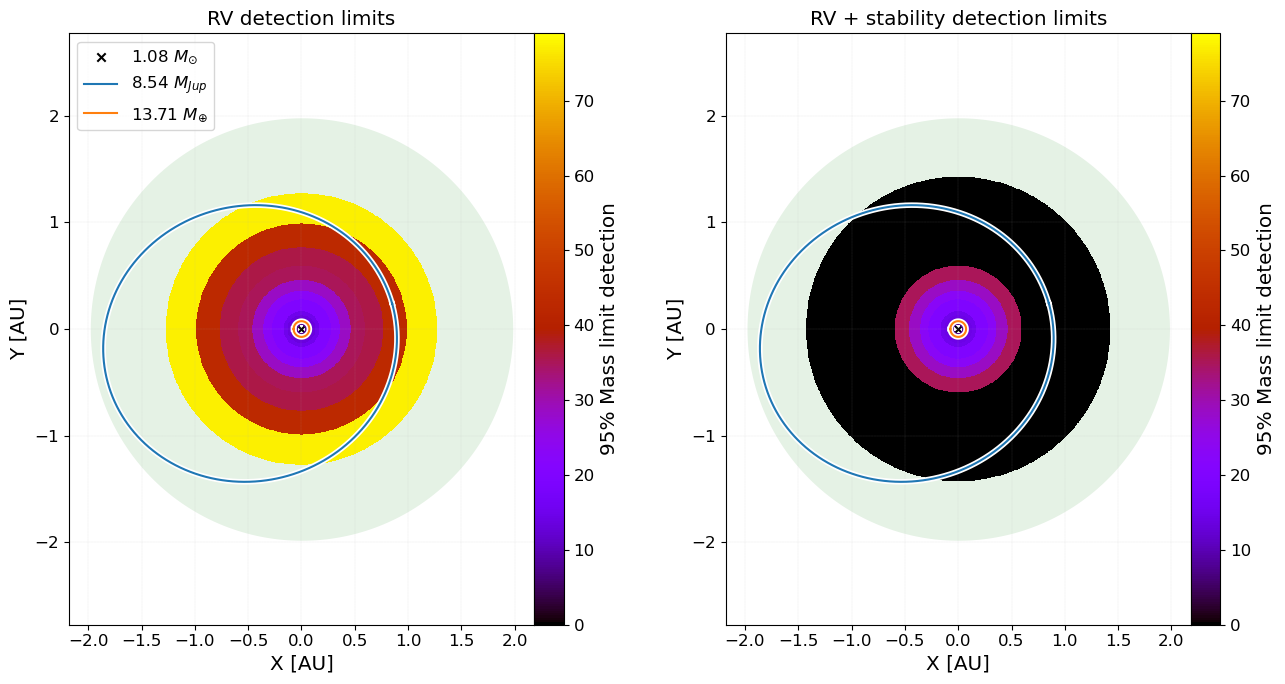

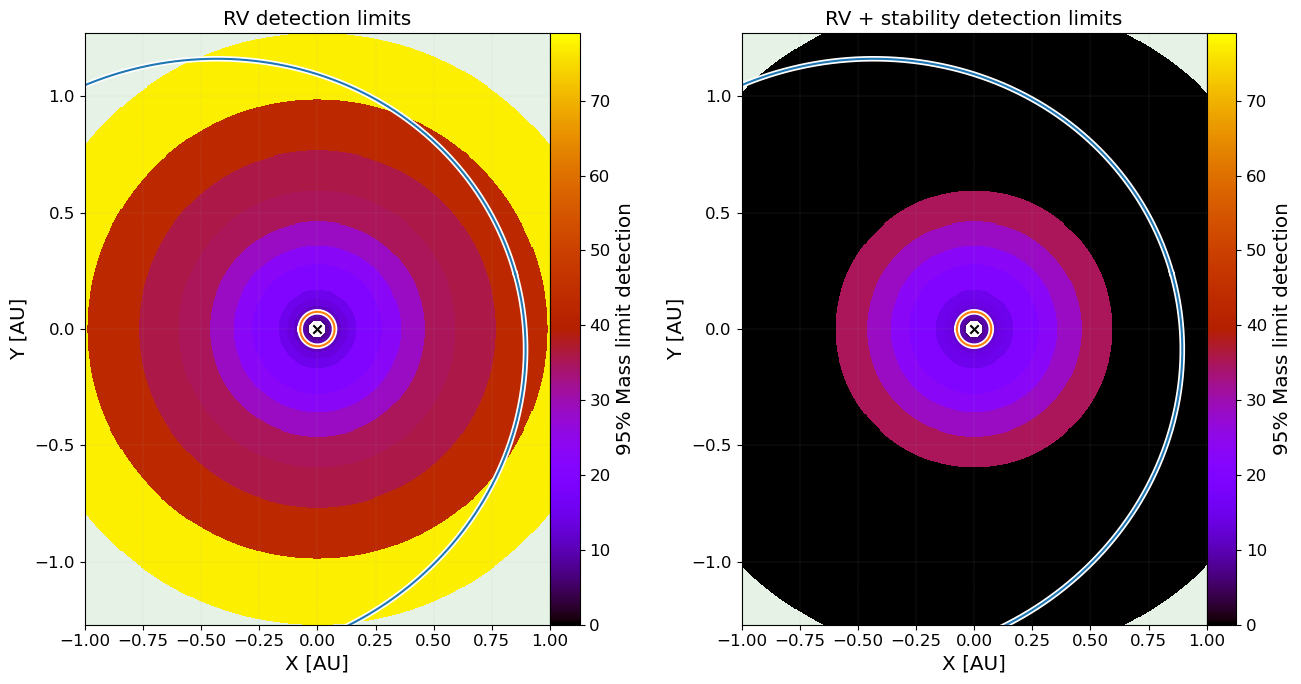

In [10]:
# ARDENT_FinalPlot(self, InjectionRecoveryFile=None, ExternalDataDL=None, DynDLfile=None, 
#                  MassUnits='Earth', percentage=95, zoom_AU=1.0)

vec.ARDENT_FinalPlot(InjectionRecoveryFile='HandsOnTuto/TOI-1736_InjectRecovTests_0.p', \
                     DynDLfile='HandsOnTuto/TOI-1736_DynamicalDL_0.dat')

##### Using ARDENT with an external source for the data-driven detection limits
You would like to use ARDENT for including the dynamical constraints while keeping your favourite data-driven detection limits software? Or you already have the data-driven detection limits and you are wondering if the dynamical constraints could be added a posteriori? It is possible! ARDENT computes the data-driven and dynamical detection limits independently, meaning that you can also use ARDENT with a data-driven limit curve obtained from an external software. Here is how (very simple). 

First, you still need to initiate an ARDENT object, so to correctly setup the output folder and define the model for the system. Then, skip the data-driven detection limits part, and call directly the function `ARDENT_DetectionLimitStab` for the computation of dynamical detection limits. Pay attention that now, you need to specify the parameter `ExternalDataDL`. It is a 2D array of the form [Pbins, Mlimits] where Pbins and Mlimits are 1D arrays of period bins (in days) and mass detection limits (in M_Earth).

Below is a code example for the system studied here. 

In [ ]:
import numpy as np
import os
import ardent 

data = np.genfromtxt('TOI1736_sophie_residualRV.dat', skip_header=int(2))
jdb, rv, rv_err = data[:,0:3].T

# Initialise ardent
vec = ardent.ARDENT_tableXY(jdb, rv, rv_err) 
vec.ARDENT_AddStar(mass=1.08,starname='TOI-1736') # No space character allowed in star name
vec.ARDENT_Set_output_dir('HandsOnTuto')

vec.ARDENT_AddPlanets(p=570.3, k=200.4, e=0.362, omega=164.3, asc_node = 0.0, mean_long=244.0, inc=70.0)
vec.ARDENT_AddPlanets(p=7.065, k=4.34, e=0.00, omega=0.0, asc_node = 0.0, mean_long=247.2, inc=90.0)

# Call the function for dynamical detection limits computation
# Suppose the data-driven detection limits were derived from another tool than ARDENT, and that 
# the vectors of period bins ('Pbins' in [days]) and mass limits ('Mlimits' in [M_Earth]) are available 
vec.ARDENT_DetectionLimitStab(NlocalCPU=5, ExternalDataDL=np.array([Pbins, Mlimits]))

# Plot results 
# Caution: to use ARDENT_Plot_StabDL function, the external DataDL file must be of specific form: 
#          - The 2 first lines are header lines: will be ignored 
#          - First column = period bins 
#          - Second column = mass limits 
vec.ARDENT_Plot_StabDL(DataDLfile='Path/to/your/own/DataDLfile', \
                       DynDLfile='HandsOnTuto/TOI-1736_DynamicalDL_0.dat')

vec.ARDENT_FinalPlot(ExternalDataDL=np.array([Pbins, Mlimits]), \
                     DynDLfile='HandsOnTuto/TOI-1736_DynamicalDL_0.dat')

### Investigate the stability of a specific solution

Going back to the plot of data-driven detection limits, we note higher detection rates around 130 days (i.e., the injected planets are detected at lower masses). This is probably due to the peak observed in the periodogram of the RV residuals around that period. Injecting a planet around 130 days creates a RV signal that interacts with this residual signal, and bumps up the combined signal. While the signal at 130 days is not significant in terms of FAP, a pressing question is "Is this signal a valid planet candidate?". 

There are several ways to investigate the planetary nature of a signal. Prior to digging into the data analyses, one might be tempted to test the orbital stability of that specific solution. A function in ARDENT does just that. Of course, this simple test does not enable to firmly exclude, or validate, the planetary nature of the signal. But this could hint that the planet is not real if the resulting solution is dynamically unstable. 

We retrieved the original SOPHIE RVs and fitted them with a 3 Keplerian model together with a quadratic drift. DACE is a great tool to carry out this step (https://dace.unige.ch/radialVelocities/). To go faster for the sake of this tutorial, you can also fit a one Keplerian model around 130 days on the residual RVs available in this folder, using DACE too. Generally, this is not ideal because you want to fit all the planets together so that the planet parameters and uncertainties are correctly taken into account. 

At the end of the fitting process, the third planet candidate has a mass of 23.27 M_Earth and an orbital period of 128.74 days. Then we test the orbital stability of this 3-planet solution with ARDENT. Specifying the period and mass only, ardent will suppose a circular and edge-on orbit, but you can change the input orbital parameters as you wish. 

In [11]:
#ARDENT_TestStability(self, P_inject, m_inject, ML_inject=0., MA_inject=None, peritime_inject=None, 
#                     e_inject=0., w_inject=0., inc_inject=90., ascnode_inject=0., param_file=None, 
#                     integration_time=None, dt=None, min_dist=3, max_dist=5, Noutputs=1000, GR=False, 
#                     relaunch=False)

vec.ARDENT_TestStability(P_inject=128.74, m_inject=23.27, relaunch=True)

 [INFO] --Long term stability-- Start of the numerical integration 


 46%|██████████████████▎                     | 459/1000 [17:16<20:21,  2.26s/it]

 [INFO] --Long term stability-- Simulation stopped! Close encounter. 


This function runs a numerical evolution with WHFast (REBOUND), for a default timescale of 1 million orbits of the outermost planet and an integration timestep of P_inner/100. It evenly records some orbital elements (semi-major axis, eccentricity, and argument of periastron) during the simulation. These can be later used to trace the orbital evolution of the planets. The simulation reaches the end unless a close encounter or escape is happening, in which case the simulation stops and indicates the cause of it. 

In our case, the system was unstable (close encounter) before the end of the simulation! From the generated output file, we can investigate what happened. The following function automatically plots the temporal evolution of semi-major axis, orbital eccentricity, and argument of periastron for each of the planets.

 [INFO] Preparing plot of the temporal evolution of the orbital elements. 


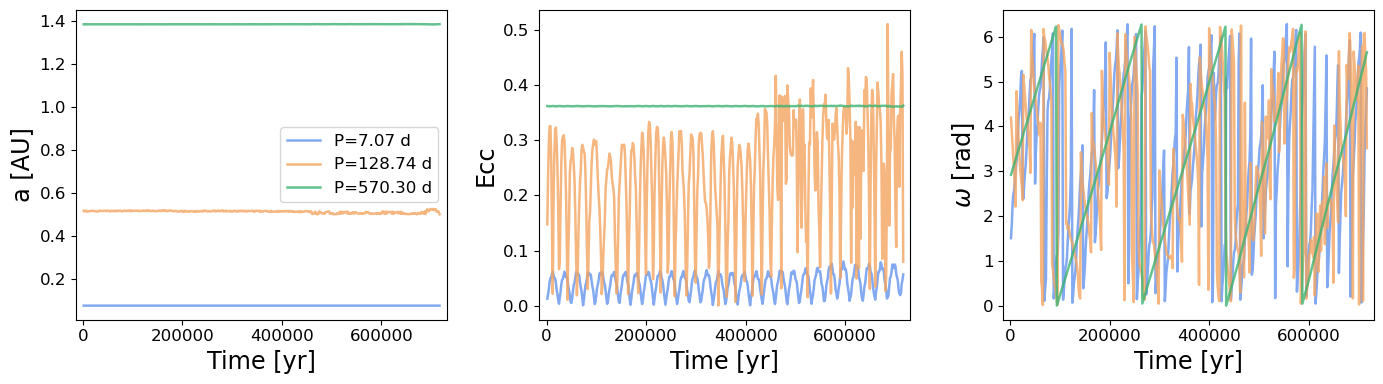

In [12]:
# ARDENT_PlotOrbitalElements(self, P_inject, m_inject, output_file=None, Noutputs=1000) 

vec.ARDENT_PlotOrbitalElements(128.74, 23.27, output_file='HandsOnTuto/TOI-1736_TestStability_P128.7_m23.3.dat') 

The orbital eccentricity of this third candidate presents an irregular evolution, indicative of orbital chaos. After some time, episodes of large eccentricity lead to a close encounter, and the simulation stops. 

This specific orbital solution for the candidate at ~130 days is therefore unstable. To provide a firm answer if this candidate is dynamically plausible, a full exploration of the parameter space around that solution is necessary. This is beyond the scope of ARDENT. However, this quick analysis indicates already that this additional candidate seems unlikely. 